# Import Libraries

In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd

- This script first applies Mini Batch K-Means clustering directly to the scaled housing data.
- It then performs dimensionality reduction on the same dataset using PCA (Principal Component Analysis) and applies Mini Batch K-Means clustering to the PCA-reduced data.
- The results of clustering on both the original and PCA-reduced data are visualized using scatter plots.

# Data Loading & Preprocessing

In [2]:
path = 'C:\\Users\\zcindemir\\Desktop\\Data Mining Project\\housing.csv'
housing = pd.read_csv(path)

housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

encoder = OneHotEncoder()
ocean_proximity_encoded = encoder.fit_transform(housing[['ocean_proximity']]).toarray()
feature_names = encoder.get_feature_names_out(['ocean_proximity'])
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=feature_names)
housing_encoded = pd.concat([housing.drop('ocean_proximity', axis=1), ocean_proximity_df], axis=1)

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_encoded)

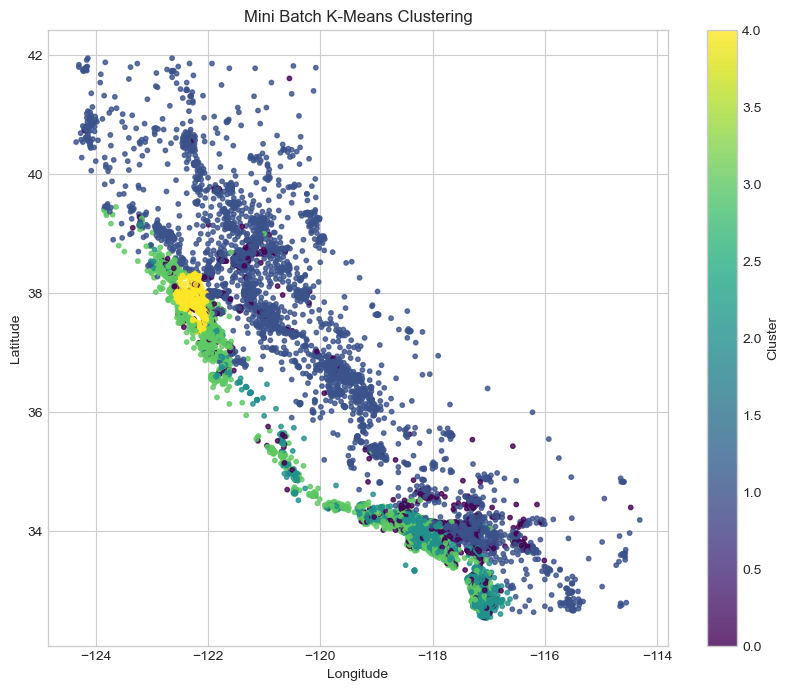

In [3]:
mbk = MiniBatchKMeans(n_clusters=5, n_init='auto', batch_size=3072)
mbk.fit(housing_scaled)
labels = mbk.labels_

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 8))
scatter = plt.scatter(housing['longitude'], housing['latitude'], c=labels, cmap='viridis', s=10, alpha=0.8, label='Clusters')
plt.colorbar(scatter, label='Cluster')
plt.title('Mini Batch K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

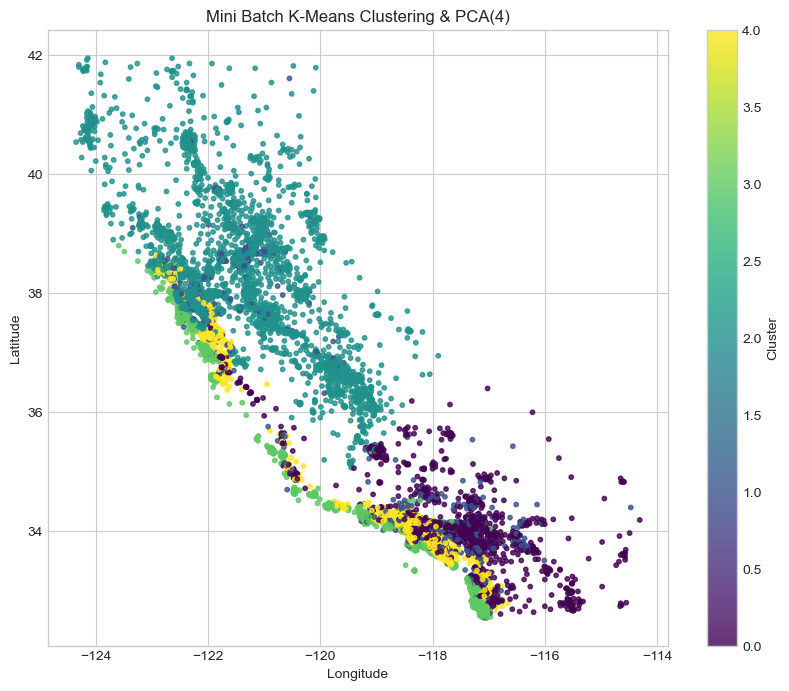

In [4]:
pca = PCA(n_components=4)
housing_pca = pca.fit_transform(housing_scaled)

mbk = MiniBatchKMeans(n_clusters=5, n_init='auto', batch_size=3072)
mbk.fit(housing_pca)
labels = mbk.labels_

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 8))
scatter = plt.scatter(housing['longitude'], housing['latitude'], c=labels, cmap='viridis', s=10, alpha=0.8, label='Clusters')
plt.colorbar(scatter, label='Cluster')
plt.title('Mini Batch K-Means Clustering & PCA(4)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()